In [30]:
include("./params.jl")
using JSON
using CSV, DataFrames
using Plots
using Statistics

In [18]:
datapath = "L500/"
fn_config = "config-sample"

"config-sample"

In [11]:
config  = JSON.parsefile(fn_config)
params = readconfig(config)

Params
  l: Array{Int64}((1,)) [1]
  L: Int64 703
  θ: Array{Float64}((1,)) [0.25]
  W: Array{Float64}((1,)) [0.0]
  E: Array{Float64}((11,)) [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  q: Array{Float64}((2,)) [2.0, 3.0]
  seed: Int64 1234
  R: Int64 10
  nev: Int64 10
  V: Float64 1.0
  E_window_width: Int64 200
  num_blas: Int64 1
  energy_path: String "energyfile"


In [15]:
function get_datafn(i, j, k)
    return "Th$(lpad(i, 2, "0"))_W$(lpad(j, 2, "0"))_E$(lpad(k, 2, "0")).csv"
end

get_datafn (generic function with 1 method)

In [25]:
df = [CSV.read(datapath*get_datafn(i, j, k), DataFrame) for i in 1:length(params.θ), j in 1:length(params.W), k in 1:length(params.E)]

1×1×11 Array{DataFrame, 3}:
[:, :, 1] =
 242×8 DataFrame
 Row │ E             r      l1_q2.0    l1_q3.0     l5_q2.0   l5_q3.0    l10_q2 ⋯
     │ Float64       Int64  Float64    Float64     Float64   Float64    Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ -0.00351809       1  0.0630763  0.00520715  0.176944  0.0368673  0.3173 ⋯
   2 │ -0.00351168       1  0.0946467  0.0160006   0.217543  0.066466   0.3302
   3 │ -0.00311876       1  0.0686456  0.00716672  0.142245  0.0248739  0.1934
   4 │ -0.00280395       1  0.181386   0.0512918   0.268415  0.0885419  0.5113
   5 │ -0.00261384       1  0.0848515  0.0102511   0.20024   0.0468075  0.2902 ⋯
   6 │ -0.00151098       1  0.0713173  0.00737372  0.18477   0.0397838  0.3225
   7 │ -0.00147765       1  0.175821   0.0440263   0.256905  0.0733755  0.5083
   8 │ -0.00145376       1  0.0508904  0.0041091   0.122406  0.0189904  0.1858
   9 │ -0.0014534        1  0.116088   0.0235847   0.270822  0.0

In [36]:
PN = Float64[]
for k in 1:length(params.E)-1
    pn = mean(df[1, 1, k][:, 3])
    display(pn)
    push!(PN, pn)
end

0.1134297056552066

0.11606597637094118

0.11511285500149253

0.13047700280734378

0.127858477462

0.15501781069983603

0.18048949565411765

0.19375976969357145

0.20619984489333334

0.24366579751999998

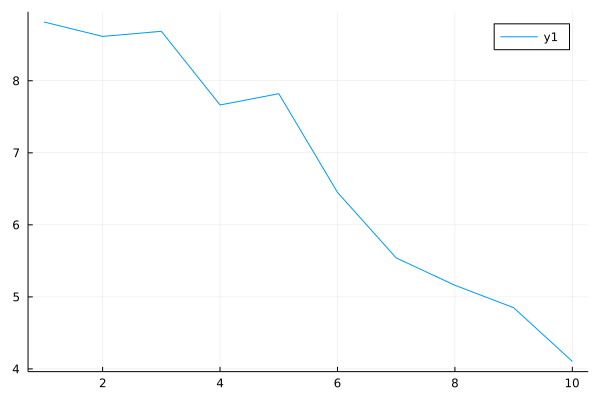

In [39]:
plot(1 ./ PN)